In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
housing = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/cal_housing_clean.csv')

In [ ]:
housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   housingMedianAge  20640 non-null  float64
 1   totalRooms        20640 non-null  float64
 2   totalBedrooms     20640 non-null  float64
 3   population        20640 non-null  float64
 4   households        20640 non-null  float64
 5   medianIncome      20640 non-null  float64
 6   medianHouseValue  20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [ ]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [ ]:
X = housing.drop('medianHouseValue',axis=1)

In [ ]:
y= housing['medianHouseValue']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
scaled_X_train.shape

(14448, 6)

In [ ]:
model= Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=scaled_X_train,y=y_train,validation_data=(scaled_X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 56264118272.0000 - val_loss: 56655663104.0000
Epoch 2/400
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56145031168.0000 - val_loss: 56653852672.0000
Epoch 3/400
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56089550848.0000 - val_loss: 56648785920.0000
Epoch 4/400
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56650625024.0000 - val_loss: 56637898752.0000
Epoch 5/400
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56967786496.0000 - val_loss: 56617967616.0000
Epoch 6/400
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55728926720.0000 - val_loss: 56585199616.0000
Epoch 7/400
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55594573824.0000 - val_loss: 56535678976.0000
Epoch 8/400
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55981502464.0000 - val_loss: 56462663680.0000
Epoch 9/400
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56180105216.0000 - val_loss: 56354865152.0000
Epoch 10/400
113/113 ━━━━━━━━━━━━━━━━

In [ ]:
losses=pd.DataFrame(model.history.history)

<Axes: >

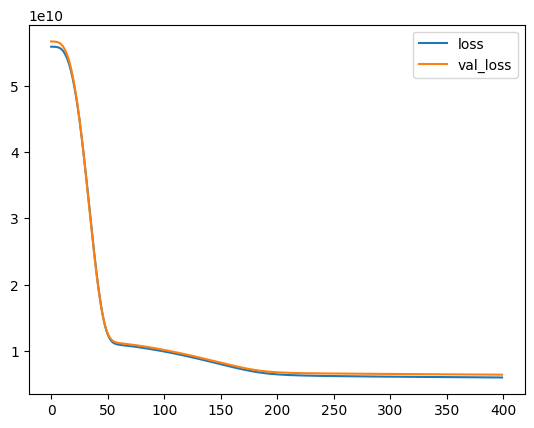

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [ ]:
predictions=model.predict(scaled_X_test)

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

80008.51588439701

In [ ]:
mean_absolute_error(y_test,predictions)

58658.36487695659

In [ ]:
explained_variance_score(y_test,predictions)

0.5270406089987127

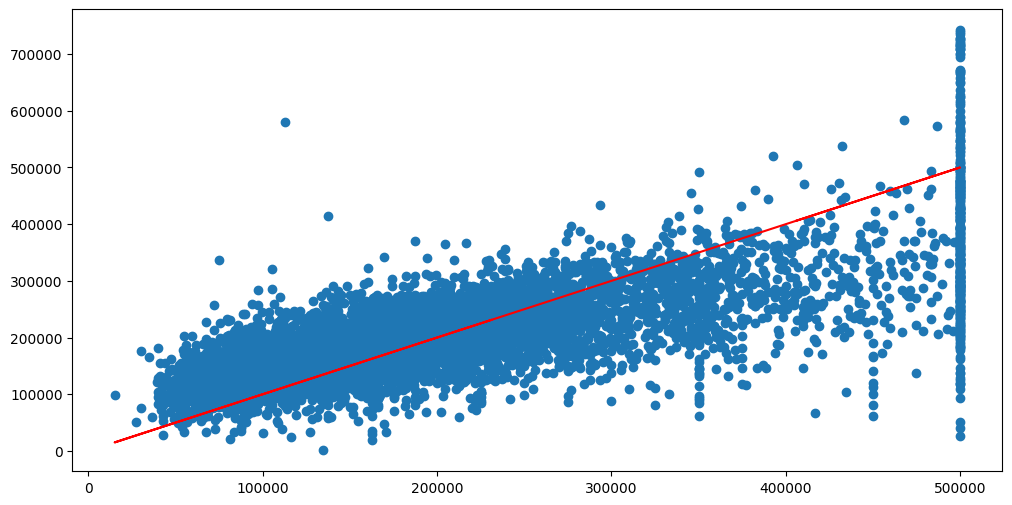

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
single_house = housing.drop('medianHouseValue',axis=1).iloc[1]

In [ ]:
single_house

,1
housingMedianAge,21.0000
totalRooms,7099.0000
totalBedrooms,1106.0000
population,2401.0000
households,1138.0000
medianIncome,8.3014


In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,6))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
single_house

array([[0.39215686, 0.18050257, 0.17147734, 0.08395477, 0.18697583,
        0.53802706]])

In [ ]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[412942.72]], dtype=float32)

In [ ]:
housing['medianHouseValue'].head(2)

,medianHouseValue
0,452600.0
1,358500.0
